<a href="https://colab.research.google.com/github/NiceNewton/NiceNewton/blob/main/DIGITPRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


In [24]:
number=pd.read_csv('train.csv.zip')

In [25]:
number= np.array(number)
m,n = number.shape
np.random.shuffle(number)
number_dev=number[0:1000].T
y_dev=number_dev[0]
x_dev=number_dev[1:n]
x_dev=x_dev/255.
number_train=number[1000:m].T
y_train=number_train[0]
x_train=number_train[1:n]
x_train=x_train/255.
_,m_train=x_train.shape


In [29]:
import numpy as np
def init_params():
    w1=np.random.rand(10,784)- 0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)- 0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2
def ReLU(z):
    return np.maximum(0,z)
def softmax(z):
    z = z - np.max(z, axis=0, keepdims=True)
    A = np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)
    return A

def forward(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y
def deriv_ReLU(z):
    return z>0
def back(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y=one_hot(y)
    dz2=a2-one_hot_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*deriv_ReLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1 -alpha*dw1
    b1=b1 -alpha*db1
    w2=w2 -alpha*dw2
    b2=b2 -alpha*db2
    return w1,b1,w2,b2


In [30]:
def get_predict(a2):
    return np.argmax(a2, 0)

def get_accuracy(prediction, y):
    print(prediction, y)
    return np.sum(prediction == y) / y.size
def gradient_descent(x, y, iteration, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iteration):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back(z1, a1, z2, a2,w1, w2,x,y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

        if i % 10 == 0:
            print("iteration: ", i)
            prediction = get_predict(a2)
            print("accuracy: ", get_accuracy(prediction, y))

    return w1, b1, w2, b2



In [31]:
 w1,b1,w2,b2= gradient_descent(x_train , y_train, 500 ,0.1)

iteration:  0
[5 5 7 ... 5 5 7] [7 2 4 ... 3 2 8]
accuracy:  0.06139024390243902
iteration:  10
[3 8 7 ... 3 3 0] [7 2 4 ... 3 2 8]
accuracy:  0.11390243902439025
iteration:  20
[3 8 7 ... 3 3 0] [7 2 4 ... 3 2 8]
accuracy:  0.15551219512195122
iteration:  30
[3 8 7 ... 3 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.1872439024390244
iteration:  40
[3 2 7 ... 3 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.2249268292682927
iteration:  50
[3 2 7 ... 3 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.289390243902439
iteration:  60
[7 2 7 ... 3 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.36646341463414633
iteration:  70
[7 2 7 ... 3 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.4186829268292683
iteration:  80
[7 2 7 ... 0 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.4547317073170732
iteration:  90
[7 2 7 ... 0 4 7] [7 2 4 ... 3 2 8]
accuracy:  0.48360975609756096
iteration:  100
[9 2 4 ... 0 4 8] [7 2 4 ... 3 2 8]
accuracy:  0.5119024390243903
iteration:  110
[9 2 4 ... 0 4 8] [7 2 4 ... 3 2 8]
accuracy:  0.5398536585365854
iteration:  120
[9 2 4 

Prediction:  [7]
Label:  7


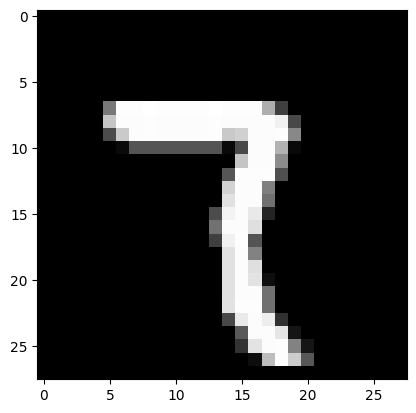

Prediction:  [2]
Label:  2


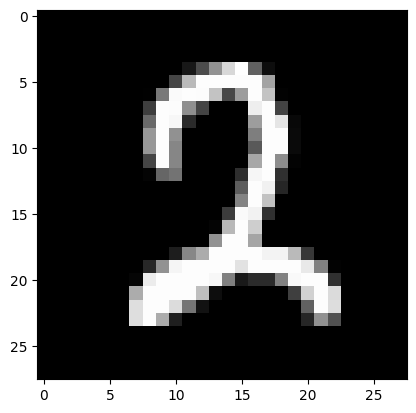

Prediction:  [4]
Label:  4


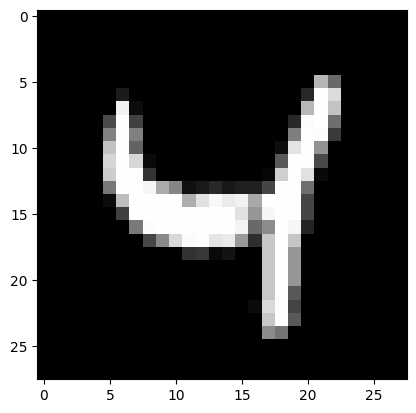

Prediction:  [8]
Label:  8


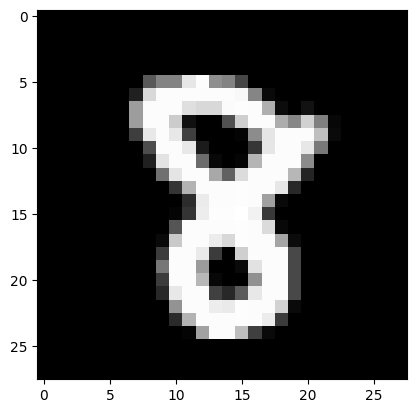

In [32]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward(w1, b1, w2, b2, x)
    predictions = get_predict(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Test predictions on a few samples
for i in range(4):
    test_prediction(i, w1, b1, w2, b2)